# Spotify listening History analysis

In [1]:
# Step 0: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Step 1: Load Dataset
df = pd.read_csv("spotify_history.csv")
spotify_palette = ['#1DB954', '#191414','#1ed760']

# Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [5]:
df.shape

(149860, 11)

In [6]:
df.head(10)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False
6,1I4EczxGBcPR3J3KeyqFJP,2013-07-08 03:17:56,web player,0,We Own The Sky,M83,Saturdays = Youth,nextbtn,nextbtn,False,False
7,5arVt2Wg0zbiWwAOZef2Nl,2013-07-08 03:17:56,web player,1268,Higher Ground - Remastered 2003,Red Hot Chili Peppers,Mother's Milk,nextbtn,nextbtn,False,False
8,1ixtaZc0Adil3yD1ItPqSl,2013-07-08 03:17:58,web player,0,Happy Up Here,Röyksopp,Happy Up Here,nextbtn,nextbtn,False,False
9,2v5mpowLQNFN7NC46l0bJS,2013-07-08 03:19:11,web player,0,Phantom,Justice,Phantom,nextbtn,clickrow,False,False


In [7]:
# Step 2: Data Cleaning
# Convert timestamps
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')
df = df.dropna(subset=['ts'])

# Filter out zero play durations
df = df[df['ms_played'] > 0]

# Fill missing reasons with 'Unknown'
df['reason_start'] = df['reason_start'].fillna('Unknown')
df['reason_end'] = df['reason_end'].fillna('Unknown')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146127 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  146127 non-null  object        
 1   ts                 146127 non-null  datetime64[ns]
 2   platform           146127 non-null  object        
 3   ms_played          146127 non-null  int64         
 4   track_name         146127 non-null  object        
 5   artist_name        146127 non-null  object        
 6   album_name         146127 non-null  object        
 7   reason_start       146127 non-null  object        
 8   reason_end         146127 non-null  object        
 9   shuffle            146127 non-null  bool          
 10  skipped            146127 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(7)
memory usage: 11.4+ MB


In [9]:
pd.isnull(df).sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

In [10]:
df.describe()

,ts,ms_played
count,146127,1.461270e+05
mean,2020-04-28 21:37:25.939025408,1.315946e+05
min,2013-07-08 02:44:34,1.000000e+00
25%,2018-03-01 02:19:03,3.427500e+03
50%,2020-08-12 23:38:20,1.447730e+05
75%,2022-01-11 18:21:51.500000,2.204260e+05
max,2024-12-15 23:06:25,1.561125e+06
std,NaN,1.175145e+05


In [11]:
#How many songs does Lana Del Rey have in total?
lana_songs = df[df['artist_name'].str.lower() == 'lana del rey']
print("Songs done by lana:",lana_songs[['track_name']].count())
print(lana_songs[['track_name']])

Songs done by lana: track_name    60
dtype: int64
                                               track_name
2                                             Born To Die
3                                        Off To The Races
43                                    Young And Beautiful
44                                    Young And Beautiful
45                                    Young And Beautiful
115                                   Young And Beautiful
116                                    Summertime Sadness
117                                           Born To Die
118                                           Video Games
119                                            Blue Jeans
122                                           Born To Die
154                                               Bel Air
155                                           Born To Die
578                                                 Radio
583                                              American
587                   

In [12]:
#FEATURE ENGINEERING
df['minutes_played'] = df['ms_played'] / 60000
df['hour'] = df['ts'].dt.hour
df['day_of_week'] = df['ts'].dt.day_name()
df['month'] = df['ts'].dt.month_name()
df['year'] = df['ts'].dt.year
df['date'] = df['ts'].dt.date

In [13]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,minutes_played,hour,day_of_week,month,year,date
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,0.053083,2,Monday,July,2013,2013-07-08
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,1.031083,2,Monday,July,2013,2013-07-08
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,4.756433,2,Monday,July,2013,2013-07-08
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2.233700,2,Monday,July,2013,2013-07-08
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False,1.058083,3,Monday,July,2013,2013-07-08


# Exploratory Data Analysis (EDA)

## Q1: Top 15 Most Played Artists

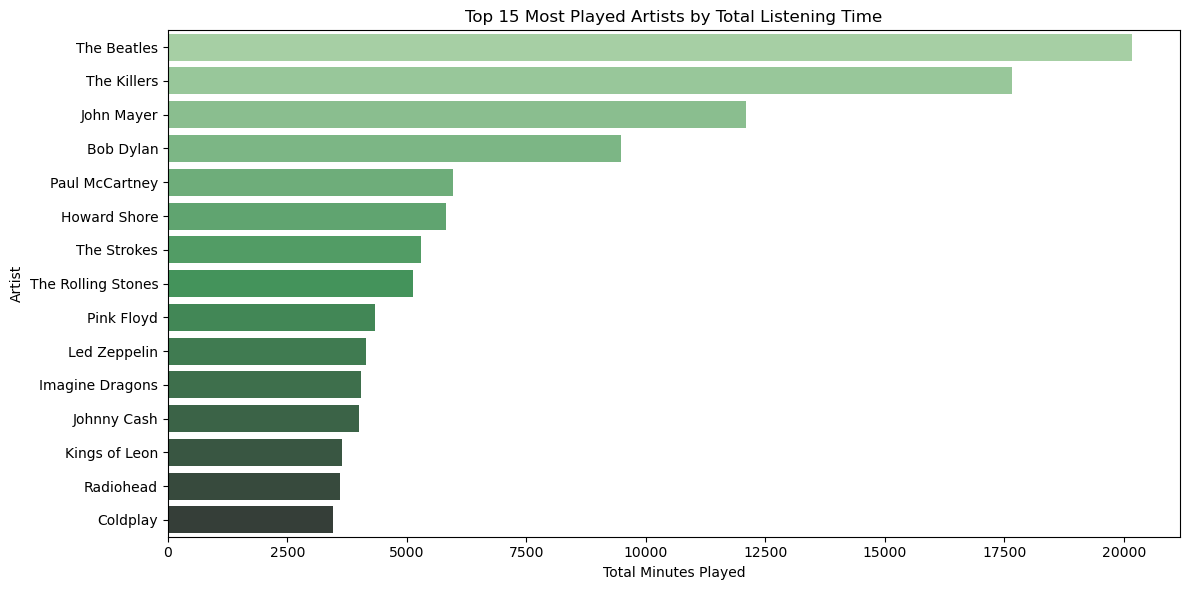

In [16]:
plt.figure(figsize=(12, 6))
top_artists = df.groupby('artist_name')['minutes_played'].sum().sort_values(ascending=False).head(15)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='Greens_d')
plt.title('Top 15 Most Played Artists by Total Listening Time')
plt.xlabel('Total Minutes Played')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

## Q2: Hourly Listening Behavior

C:\Users\Sumanth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sumanth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


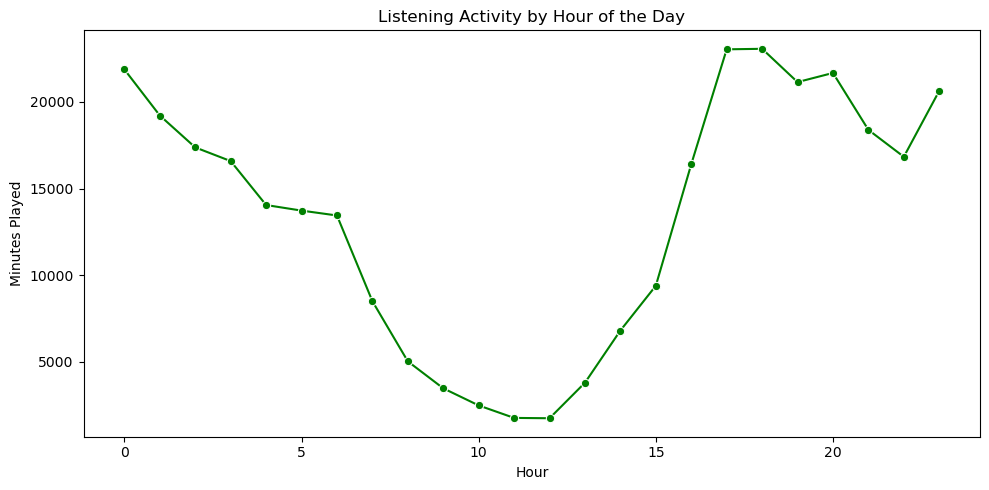

In [18]:
plt.figure(figsize=(10, 5))
hourly = df.groupby('hour')['minutes_played'].sum()
sns.lineplot(x=hourly.index, y=hourly.values, marker='o', color='green')
plt.title("Listening Activity by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Minutes Played")
plt.tight_layout()
plt.show()

## Q3: Listening by Day of Week

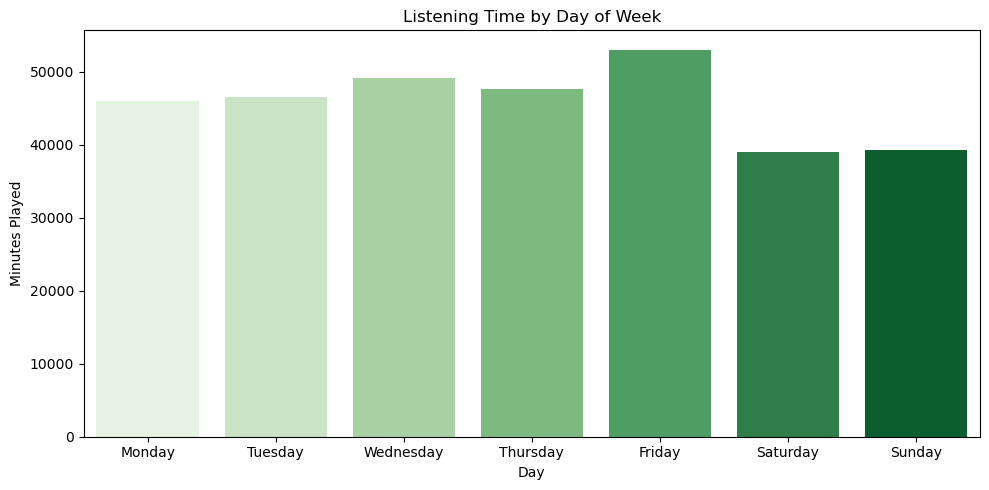

In [20]:
# Q3: Listening by Day of Week
plt.figure(figsize=(10, 5))
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow = df.groupby('day_of_week')['minutes_played'].sum().reindex(dow_order)
sns.barplot(x=dow.index, y=dow.values, palette='Greens')
plt.title("Listening Time by Day of Week")
plt.xlabel("Day")
plt.ylabel("Minutes Played")
plt.tight_layout()
plt.show()

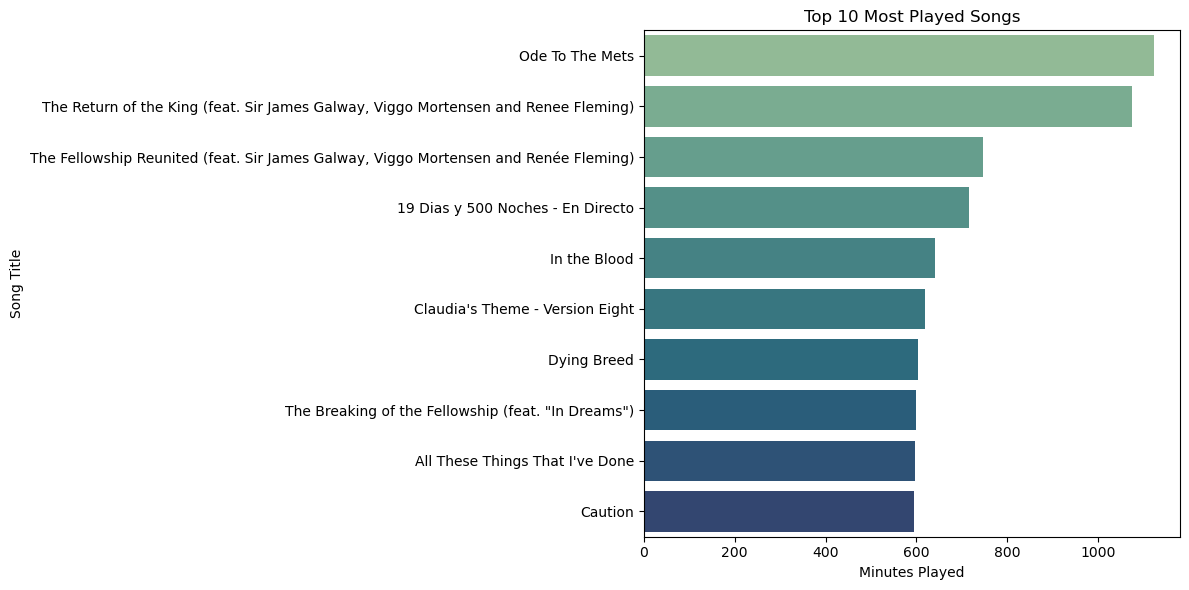

In [22]:
# Q4: Most Played Songs
plt.figure(figsize=(12, 6))
top_songs = df.groupby('track_name')['minutes_played'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_songs.values, y=top_songs.index, palette='crest')
plt.title('Top 10 Most Played Songs')
plt.xlabel('Minutes Played')
plt.ylabel('Song Title')
plt.tight_layout()
plt.show()

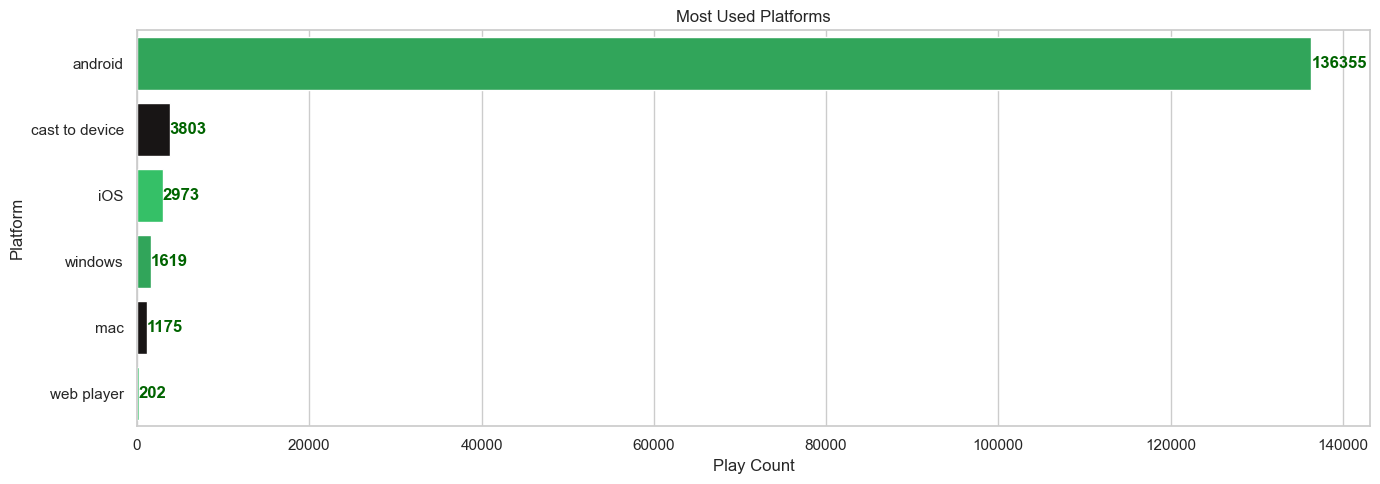

In [90]:
plt.figure(figsize=(14, 5))
platforms = df['platform'].value_counts()
sns.set(style='whitegrid')
barplot = sns.barplot(x=platforms.values, y=platforms.index, palette=spotify_palette)

for i, v in enumerate(platforms.values):
    plt.text(v + 5, i, str(v), color='darkgreen', va='center', fontweight='bold')  

plt.title('Most Used Platforms')
plt.xlabel('Play Count')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()


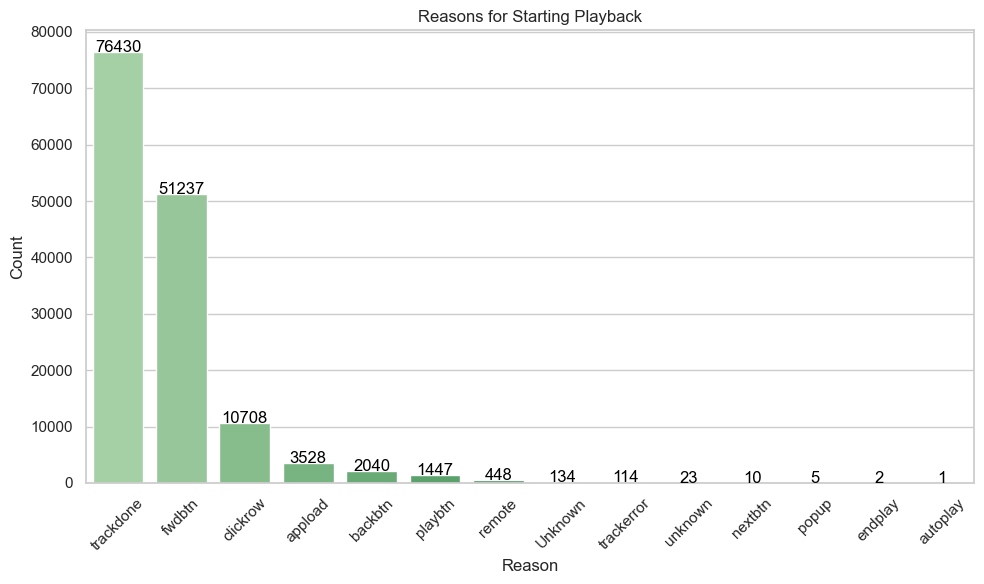

In [76]:

plt.figure(figsize=(10, 6))
start_reason = df['reason_start'].value_counts()
sns.set(style='whitegrid')
barplot = sns.barplot(x=start_reason.index, y=start_reason.values, palette='Greens_d')

for i, v in enumerate(start_reason.values):
    plt.text(i, v + 5, str(v), ha='center', color='black')

plt.title('Reasons for Starting Playback')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


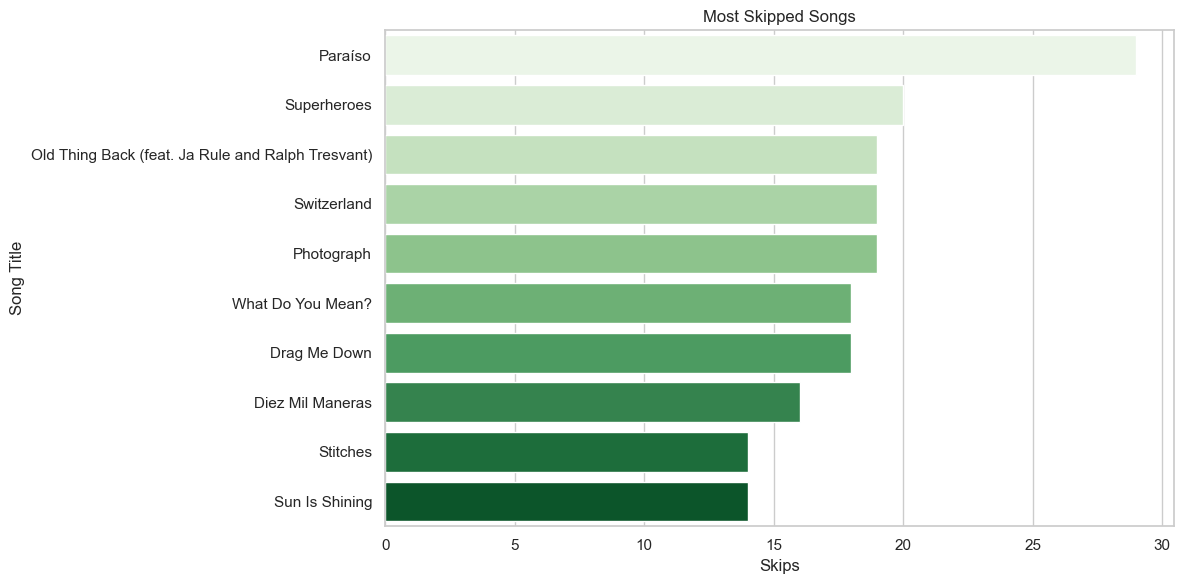

In [29]:
# Q7: Most Skipped Songs
plt.figure(figsize=(12, 6))
skipped = df[df['skipped'] == True]
skipped_songs = skipped.groupby('track_name').size().sort_values(ascending=False).head(10)
sns.barplot(x=skipped_songs.values, y=skipped_songs.index, palette='Greens')
plt.title('Most Skipped Songs')
plt.xlabel('Skips')
plt.ylabel('Song Title')
plt.tight_layout()
plt.show()

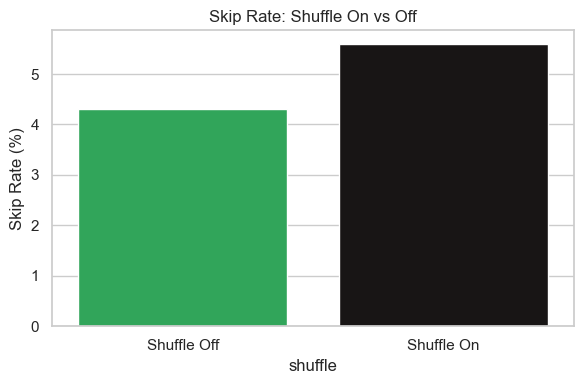

In [31]:
# Q8: Skip Rate with Shuffle
spotify_palette = ['#1DB954', '#191414', '#1ed760'] 
plt.figure(figsize=(6, 4))
skip_shuffle = df.groupby('shuffle')['skipped'].mean() * 100
sns.barplot(x=skip_shuffle.index.map({True: "Shuffle On", False: "Shuffle Off"}), y=skip_shuffle.values, palette=spotify_palette)
plt.title('Skip Rate: Shuffle On vs Off')
plt.ylabel('Skip Rate (%)')
plt.tight_layout()
plt.show()

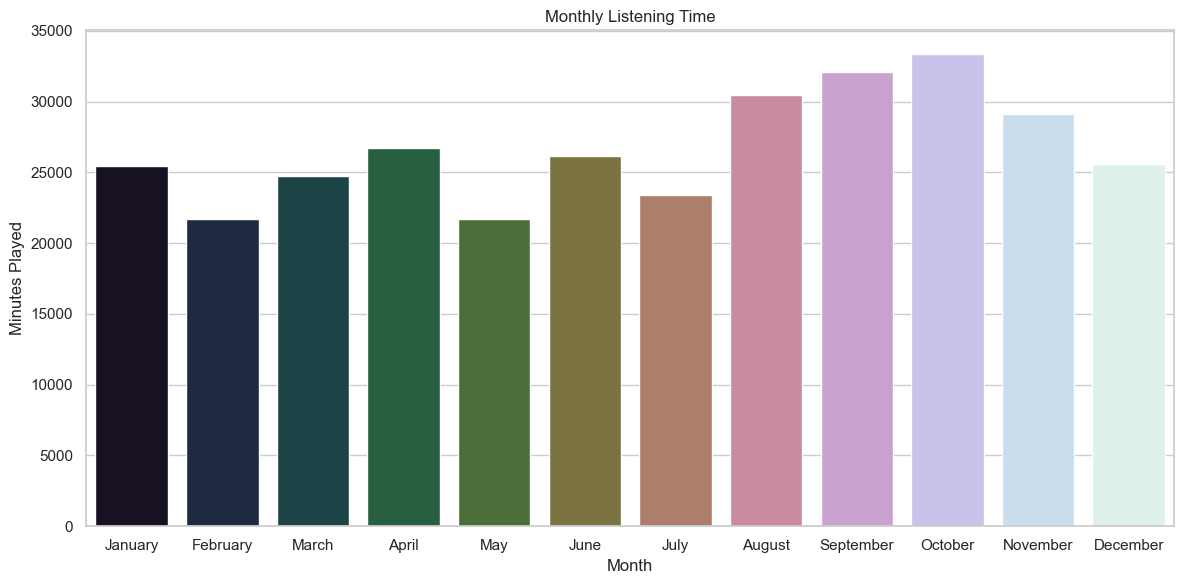

In [36]:
# Q10: Monthly Listening Trends
plt.figure(figsize=(12, 6))
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly = df.groupby('month')['minutes_played'].sum().reindex(month_order)
sns.barplot(x=monthly.index, y=monthly.values, palette='cubehelix')
plt.title('Monthly Listening Time')
plt.xlabel('Month')
plt.ylabel('Minutes Played')
plt.tight_layout()
plt.show()

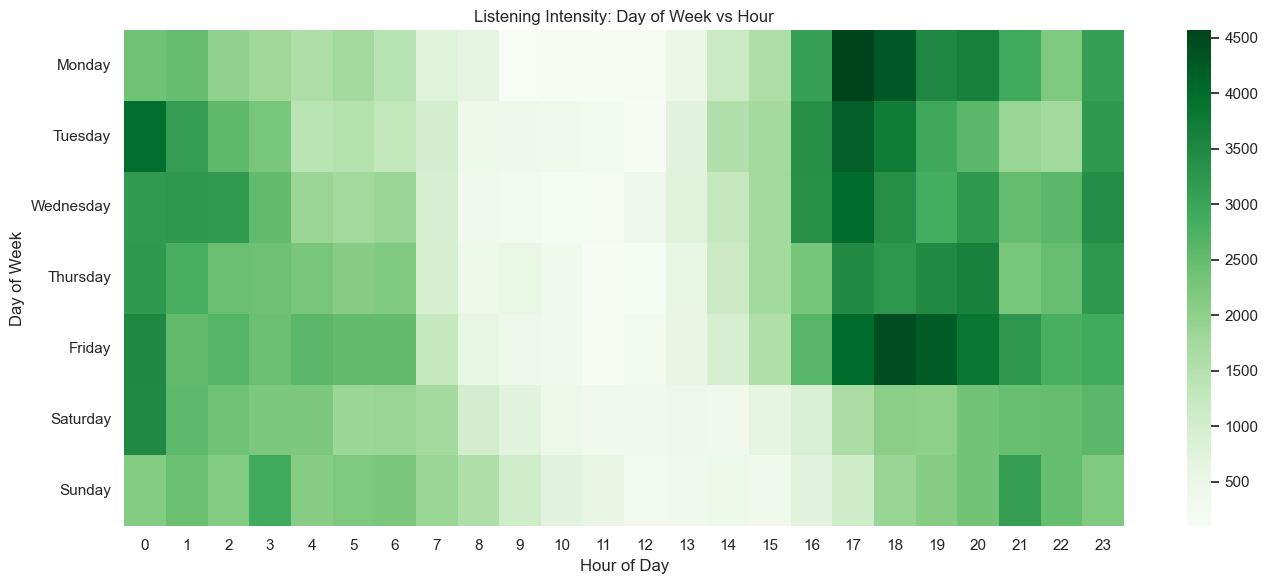

In [82]:
# Q11: Heatmap - Hour vs Day of Week Listening Pattern
pivot_table = df.pivot_table(index='day_of_week', columns='hour', values='minutes_played', aggfunc='sum').reindex(dow_order)
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap='Greens')
plt.title('Listening Intensity: Day of Week vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_26560\1975635816.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_pref = df.groupby(time_blocks)['minutes_played'].sum()
C:\Users\Sumanth\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


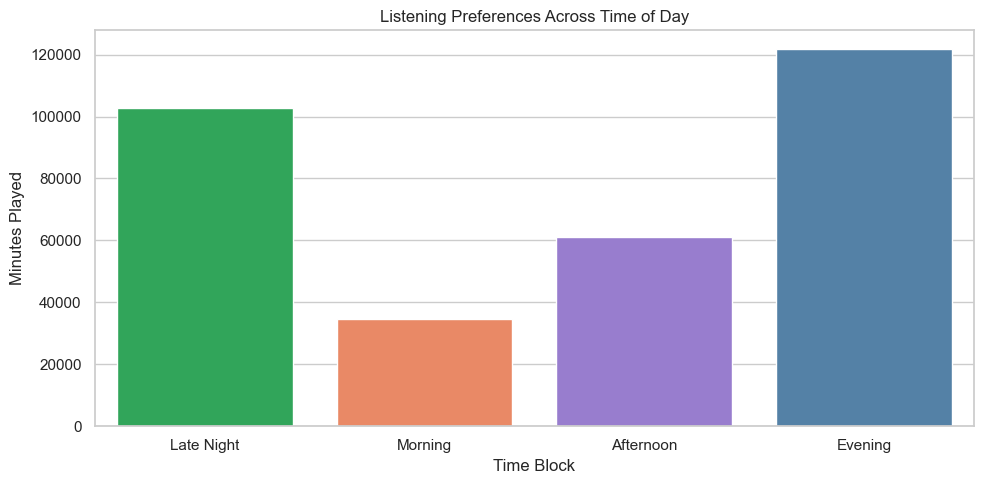

In [40]:
# Q12: Night Owl or Early Bird
plt.figure(figsize=(10, 5))
s_palette=['#1DB954', '#FF7F50', '#9370DB', '#4682B4']
time_blocks = pd.cut(df['hour'], bins=[0, 6, 12, 18, 24], labels=['Late Night', 'Morning', 'Afternoon', 'Evening'], right=False)
time_pref = df.groupby(time_blocks)['minutes_played'].sum()
sns.barplot(x=time_pref.index, y=time_pref.values, palette=s_palette)
plt.title('Listening Preferences Across Time of Day')
plt.xlabel('Time Block')
plt.ylabel('Minutes Played')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

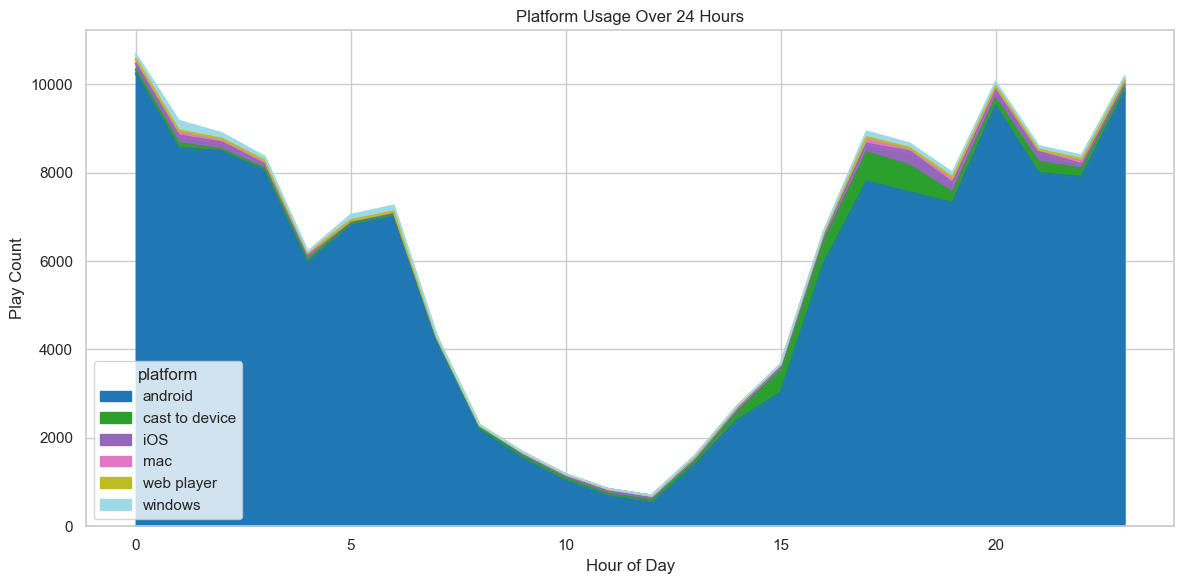

In [44]:

# Q17: Device Usage by Time of Day
plt.figure(figsize=(12, 6))
dev_time = df.groupby(['hour', 'platform']).size().unstack().fillna(0)
dev_time.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Platform Usage Over 24 Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Play Count")
plt.tight_layout()
plt.show()

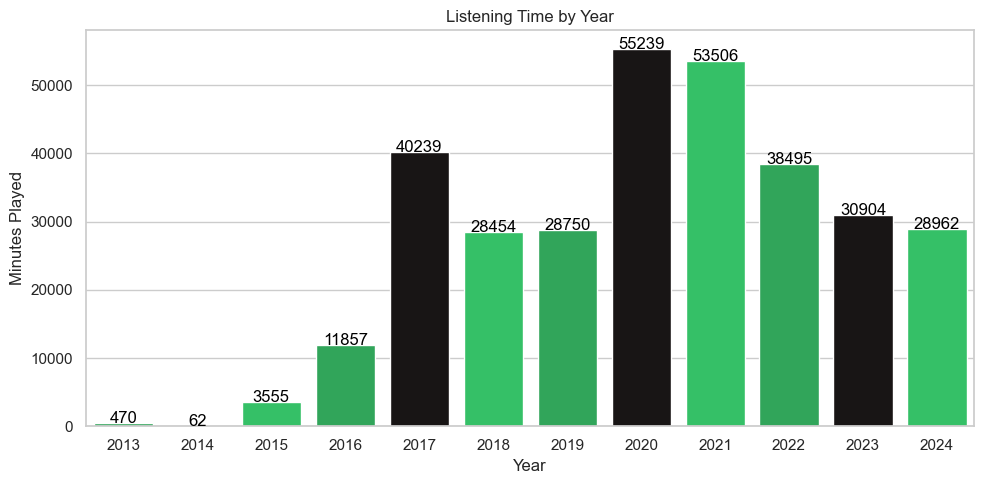

In [62]:

# Q9: Listening Trend by Year
plt.figure(figsize=(10, 5))
yearly = df.groupby('year')['minutes_played'].sum()
sns.barplot(x=yearly.index, y=yearly.values, palette=spotify_palette)
for i, v in enumerate(yearly.values):
    plt.text(i, v + 5, str(int(round(v))), ha='center', color='black')
plt.title('Listening Time by Year')
plt.xlabel('Year')
plt.ylabel('Minutes Played')
plt.tight_layout()
plt.show()

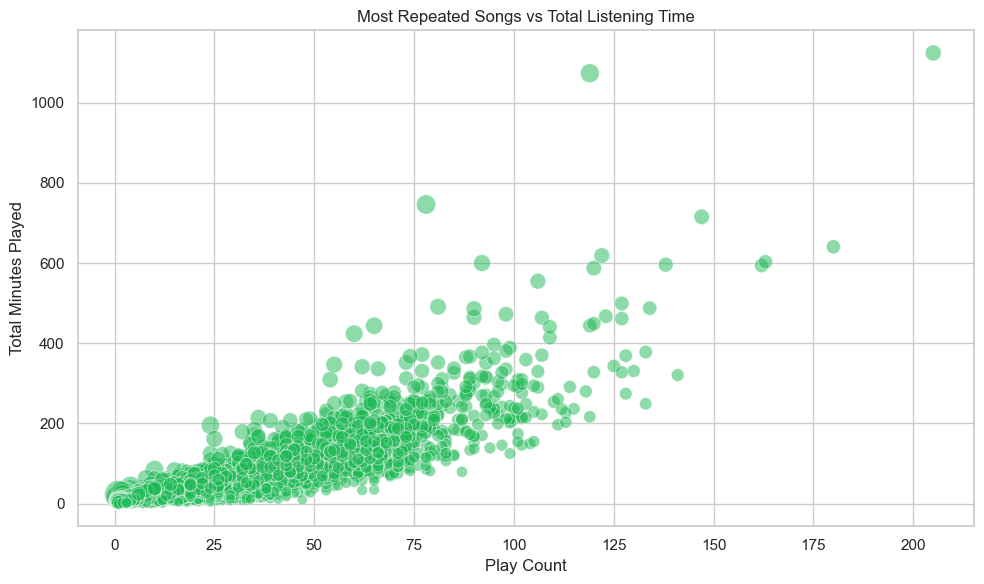

In [98]:
track_repeat_stats = df.groupby('track_name').agg({
    'minutes_played': ['sum', 'count']
})
track_repeat_stats.columns = ['total_minutes', 'play_count']
track_repeat_stats['avg_duration'] = track_repeat_stats['total_minutes'] / track_repeat_stats['play_count']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=track_repeat_stats, x='play_count', y='total_minutes', size='avg_duration',
                sizes=(50, 400), alpha=0.5, color='#1DB954', legend=False)
plt.title('Most Repeated Songs vs Total Listening Time')
plt.xlabel('Play Count')
plt.ylabel('Total Minutes Played')
plt.tight_layout()
plt.show()